# FOOTBALL GAME ANALYSIS 3
## WORLD 11 USING FIFA 22 DATASET
## DATA VISUALIZATION PROJECT
### BY
### * ARKARAJ GHOSH 19BCE2418
### * PRATYAY PIYUSH 19BCE2364
### * SAUMITRA PATHAK 19BCE2411
### * SHIVAM BANSAL 19BCE0930

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import numpy as np
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("data/FIFA22.csv")
df.head(25)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,24-06-1987,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,10-08-2021,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92.0,93,93,93,92.0,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,21-08-1988,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,01-07-2014,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85.0,88,88,88,85.0,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,05-02-1985,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,27-08-2021,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88.0,89,89,89,88.0,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/f

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(18), int64(44), object(48)
memory usage: 16.1+ MB


In [6]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.0

In [7]:
df.drop(['sofifa_id','player_url','real_face','player_tags','player_traits','release_clause_eur'], axis=1, inplace=True)

In [8]:
df.head()

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,24-06-1987,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,10-08-2021,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92.0,93,93,93,92.0,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,21-08-1988,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,01-07-2014,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85.0,88,88,88,85.0,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,05-02-1985,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,27-08-2021,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88.0,89,89,89,88.0,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,05-02-1992,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,03-08-2017,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90.0,88,88,88,90.0,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.so

In [9]:
df1=df[['nationality_name']].groupby(['nationality_name'])['nationality_name'].count().reset_index(name='count').sort_values(['count'],ascending='false')
df2=df1[df1.shape[0]-10:df1.shape[0]]
px.pie(df2, values='count', names='nationality_name', title='% of players from the biggest footballing Countries in the world')

In [10]:
df['age'].iplot(kind='hist', title='Age', labels=dict(x="Age", y="Count"))

In [11]:
df.drop(['club_contract_valid_until', 'height_cm', 'weight_kg'], axis=1, inplace=True)

In [12]:
#weights
a = 1
b = 2
c = 3
d = 4

In [13]:
df['goalkeeping_speed'] = df['goalkeeping_speed'].fillna(0)

In [14]:
#GoalKeeping Characteristics
df['gk_Shot_Stopper'] = (d*df.goalkeeping_reflexes + c*df.goalkeeping_diving + c*df.power_jumping + b*df.mentality_composure + b*df.movement_reactions + a*df.power_strength + 
                        b*df.goalkeeping_positioning + b*df.goalkeeping_handling) /(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.movement_reactions + b*df.mentality_composure + a*df.attacking_short_passing + a*df.skill_long_passing + b*df.power_jumping 
                    + b*df.goalkeeping_positioning + b*df.goalkeeping_diving + d*df.goalkeeping_reflexes 
                    + b*df.goalkeeping_handling + d*df.goalkeeping_kicking + c*df.mentality_vision)/(2*a + 4*b + 3*c + 2*d)

In [15]:
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
sd.iplot(kind='bar', x='short_name', y='gk_Shot_Stopper', title='Best Goalkeepers based on Shot Stopping')

In [16]:
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
sd.iplot(kind='bar', x='short_name', y='gk_Sweeper', title='Best Goalkeepers based on Sweeping Keeping')

In [17]:
##Defensive Characteristics
df['df_centre_backs'] = ( d*df.movement_reactions + c*df.mentality_interceptions + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + 
                         b*df.mentality_vision+ b*df.mentality_composure + b*df.attacking_crossing +a*df.attacking_short_passing + b*df.skill_long_passing+ 
                         c*df.movement_acceleration + b*df.movement_sprint_speed + d*df.power_stamina + d*df.power_jumping + d*df.attacking_heading_accuracy + 
                         b*df.power_long_shots + d*df.defending_marking_awareness + c*df.mentality_aggression)/(6*b + 3*c + 7*d)

df['df_wb_Wing_Backs'] = (b*df.skill_ball_control + a*df.skill_dribbling + 
                          a*df.defending_marking_awareness + d*df.defending_sliding_tackle + d*df.defending_standing_tackle + 
                          a*df.mentality_positioning + c*df.mentality_vision + c*df.attacking_crossing + b*df.attacking_short_passing + 
                          c*df.skill_long_passing + d*df.movement_acceleration +d*df.movement_sprint_speed + c*df.power_stamina + 
                          a*df.attacking_finishing)/(4*a + 2*b + 4*c + 4*d)


In [18]:
sd = df[(df['club_position'] == 'LCB') | (df['club_position'] == 'CB')].sort_values('df_centre_backs', ascending=False)[:5]
px.pie(sd, values='df_centre_backs', names='short_name', title='The Top 5 Left Center Backs\'s in the world')

In [19]:
sd = df[(df['club_position'] == 'RCB') | (df['club_position'] == 'CB')].sort_values('df_centre_backs', ascending=False)[:5]
px.pie(sd, values='df_centre_backs', names='short_name', title='The Top 5 Right Center Back\'s in the world')

In [20]:
sd = df[(df['club_position'] == 'RCB') | (df['club_position'] == 'CB') | (df['club_position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
sd.iplot(kind='bar', x='short_name', y='df_centre_backs', title='Best Center Backs in the World')

In [21]:
sd = df[(df['club_position'] == 'LB') | (df['club_position'] == 'LWB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
px.pie(sd, values='df_wb_Wing_Backs', names='short_name', title='The Top 5 Left Back\'s in the world')

In [22]:
sd = df[(df['club_position'] == 'RB') | (df['club_position'] == 'RWB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
px.pie(sd, values='df_wb_Wing_Backs', names='short_name', title='The Top 5 Right Back\'s in the world')

In [23]:
sd = df[(df['club_position'] == 'RB') | (df['club_position'] == 'LB') | (df['club_position'] == 'LWB') | (df['club_position'] == 'RWB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
sd.iplot(kind='bar', x='short_name', y='df_centre_backs', title='Best Full Backs in the World')

In [24]:
df['mf_playmaker'] = (d*df.skill_ball_control + d*df.skill_dribbling + a*df.defending_marking_awareness + 
                      d*df.movement_reactions + d*df.mentality_vision + c*df.mentality_positioning + c*df.attacking_crossing + 
                      d*df.attacking_short_passing + c*df.skill_long_passing + c*df.skill_curve + b*df.power_long_shots + 
                      c*df.skill_fk_accuracy)/(1*a + 1*b + 4*c + 4*d)

df['mf_beast'] = (d*df.movement_agility + c*df.movement_balance + b*df.power_jumping + c*df.power_strength + 
                  d*df.power_stamina + a*df.movement_sprint_speed + c*df.movement_acceleration + d*df.attacking_short_passing + 
                  c*df.mentality_aggression + d*df.movement_reactions + b*df.defending_marking_awareness + b*df.defending_standing_tackle + 
                  b*df.defending_sliding_tackle + b*df.mentality_interceptions)/(1*a + 5*b + 4*c + 4*d)

df['mf_controller'] = (b*df.weak_foot + d*df.skill_ball_control + a*df.skill_dribbling + 
                       a*df.defending_marking_awareness + a*df.movement_reactions + c*df.mentality_vision + c*df.mentality_composure + 
                       d*df.attacking_short_passing + d*df.skill_long_passing)/(2*c + 3*d + 4*a)

In [25]:
sd = df[(df['club_position'] == 'CAM')].sort_values('mf_playmaker', ascending=False)[:5]
px.pie(sd, values='mf_playmaker', names='short_name', title='The Top 5 Central Attacking Midfielder\'s in the world')

In [26]:
sd = df[(df['club_position'] == 'CDM')].sort_values('mf_beast', ascending=False)[:5]
px.pie(sd, values='mf_beast', names='short_name', title='The Top 5 Central Defensive Midfielder\'s in the world')

In [27]:
sd = df[(df['club_position'] == 'CM') | (df['club_position'] == 'LCM') | (df['club_position'] == 'RCM')].sort_values('mf_controller', ascending=False)[:5]
px.pie(sd, values='mf_controller', names='short_name', title='The Top 5 Central Midfielder\'s in the world')

In [28]:
#Attackers
df['att_left_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.skill_dribbling + 
                       c*df.movement_sprint_speed + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + 
                       b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + 
                       a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a 
                       + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.weak_foot + c*df.skill_ball_control + c*df.skill_dribbling + 
                       c*df.movement_sprint_speed + d*df.movement_acceleration + b*df.mentality_vision + c*df.attacking_crossing + 
                       b*df.attacking_short_passing + b*df.skill_long_passing + b*df.mentality_aggression + b*df.movement_agility + 
                       a*df.skill_curve + c*df.power_long_shots + b*df.skill_fk_accuracy + d*df.attacking_finishing)/(a 
                       + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.weak_foot + b*df.skill_ball_control + a*df.mentality_vision + 
                     b*df.mentality_aggression + b*df.movement_agility + a*df.skill_curve + a*df.power_long_shots + 
                     d*df.movement_balance + d*df.attacking_finishing + d*df.attacking_heading_accuracy + c*df.power_jumping + 
                     c*df.skill_dribbling)/(3*a + 4*b + 2*c + 3*d)

In [29]:
sd = df[(df['club_position'] == 'LW') | (df['club_position'] == 'LM')].sort_values('att_left_wing', ascending=False)[:5]
px.pie(sd, values='att_left_wing', names='short_name', title='The Top 5 Left Winger\'s in the world')

In [30]:
sd = df[(df['club_position'] == 'RW') | (df['club_position'] == 'RM')].sort_values('att_right_wing', ascending=False)[:5]
px.pie(sd, values='att_right_wing', names='short_name', title='The Top 5 Right Winger\'s in the world')

In [31]:
sd = df[(df['club_position'] == 'CF') | (df['club_position'] == 'ST')].sort_values('att_striker', ascending=False)[:5]
px.pie(sd, values='att_striker', names='short_name', title='The Top 5 Striker\'s in the world')

In [32]:
def draw_pitch(pitch, line):
    line = line
    pitch = pitch
    fig,ax = plt.subplots(figsize=(6.8,10.4))
    plt.ylim(-1,105)
    plt.xlim(-1,69)
    ax.axis('off') # this hides the x and y ticks
    # side and goal lines # 68*104 playing field
    lx1 = [0,0,68,68,0]
    ly1 = [0,104,104,0,0]
    plt.plot(lx1,ly1,color=line,zorder=5)
    # boxes, 6 yard box and goals
    #outer boxes#
    lx2 = [13.84,13.84,54.16,54.16] 
    ly2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color=line,zorder=5)
    lx3 = [13.84,13.84,54.16,54.16] 
    ly3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color=line,zorder=5)
    #goals#
    lx4 = [30.34,30.34,37.66,37.66]
    ly4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color=line,zorder=5)
    lx5 = [30.34,30.34,37.66,37.66]
    ly5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color=line,zorder=5)
    #6 yard boxes#
    lx6 = [24.84,24.84,43.16,43.16]
    ly6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color=line,zorder=5)
    lx7 = [24.84,24.84,43.16,43.16]
    ly7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color=line,zorder=5)
    #Halfway line, penalty spots, and kickoff spot
    lx8 = [0,68] 
    ly8 = [52,52]
    plt.plot(lx8,ly8,color=line,zorder=5)
    plt.scatter(34,93,color=line,zorder=5)
    plt.scatter(34,11,color=line,zorder=5)
    plt.scatter(34,52,color=line,zorder=5)
    circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, 
    zorder=1,alpha=1)
    circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, 
    zorder=1,alpha=1)
    circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, 
    zorder=2,alpha=1)
    ## Rectangles in boxes
    rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
    rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
    ## Pitch rectangle
    rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
    #Add Player Photos
    arr = mpimg.imread('data/images/messi.jfif')
    imagebox = OffsetImage(arr, zoom=0.5)
    ab = AnnotationBbox(imagebox, (60, 80))
    ax.add_artist(ab)
    arr1 = mpimg.imread('data/images/neymar.jfif')
    imagebox = OffsetImage(arr1,0.5)
    ab = AnnotationBbox(imagebox, (10, 80))
    ax.add_artist(ab)
    arr2 = mpimg.imread('data/images/lewa.jfif')
    imagebox = OffsetImage(arr2,0.5)
    ab = AnnotationBbox(imagebox, (35, 80))
    ax.add_artist(ab)
    arr3 = mpimg.imread('data/images/kdb.jfif')
    imagebox = OffsetImage(arr3,0.5)
    ab = AnnotationBbox(imagebox, (48, 55))
    ax.add_artist(ab)
    arr4 = mpimg.imread('data/images/neuer.jfif')
    imagebox = OffsetImage(arr4,0.5)
    ab = AnnotationBbox(imagebox, (35, 5))
    ax.add_artist(ab)
    arr5 = mpimg.imread('data/images/ramos.jfif')
    imagebox = OffsetImage(arr5,0.5)
    ab = AnnotationBbox(imagebox, (25, 25))
    ax.add_artist(ab)
    arr6 = mpimg.imread('data/images/hakimi.jfif')
    imagebox = OffsetImage(arr6,0.5)
    ab = AnnotationBbox(imagebox, (63, 25))
    ax.add_artist(ab)
    arr7 = mpimg.imread('data/images/bruno.jfif')
    imagebox = OffsetImage(arr7,0.5)
    ab = AnnotationBbox(imagebox, (20, 55))
    ax.add_artist(ab)
    arr8 = mpimg.imread('data/images/marq.jfif')
    imagebox = OffsetImage(arr8,0.5)
    ab = AnnotationBbox(imagebox, (45, 25))
    ax.add_artist(ab)
    arr9 = mpimg.imread('data/images/case.jfif')
    imagebox = OffsetImage(arr9,0.5)
    ab = AnnotationBbox(imagebox, (35, 40))
    ax.add_artist(ab)
    arr10 = mpimg.imread('data/images/joao.jfif')
    imagebox = OffsetImage(arr10,0.5)
    ab = AnnotationBbox(imagebox, (5, 25))
    ax.add_artist(ab)
    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)

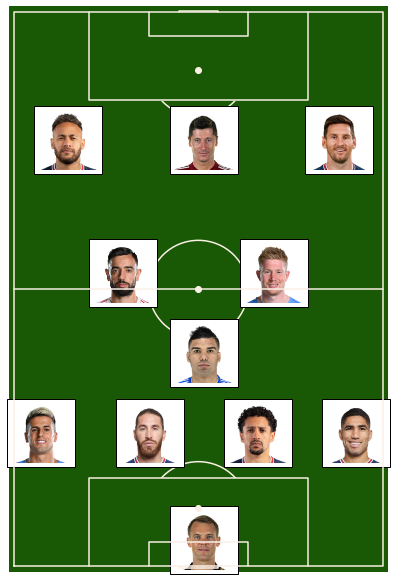

In [33]:
draw_pitch("#195905","#faf0e6")